# Interpolation the Fay & McKinley 2014 biomes onto ASTE grid

In [1]:
import MITgcm_recipes
import xarray as xr

## Load the original data

In [2]:
datadir = '/local/data/artemis/workspace/rdussin/Observations/Biomes_FayMcKinley/originals/'
biomes = datadir + 'Time_Varying_Biomes.nc'

In [3]:
ds = xr.open_dataset(biomes)

In [4]:
dst = ds.transpose(*('year', 'lat', 'lon'))

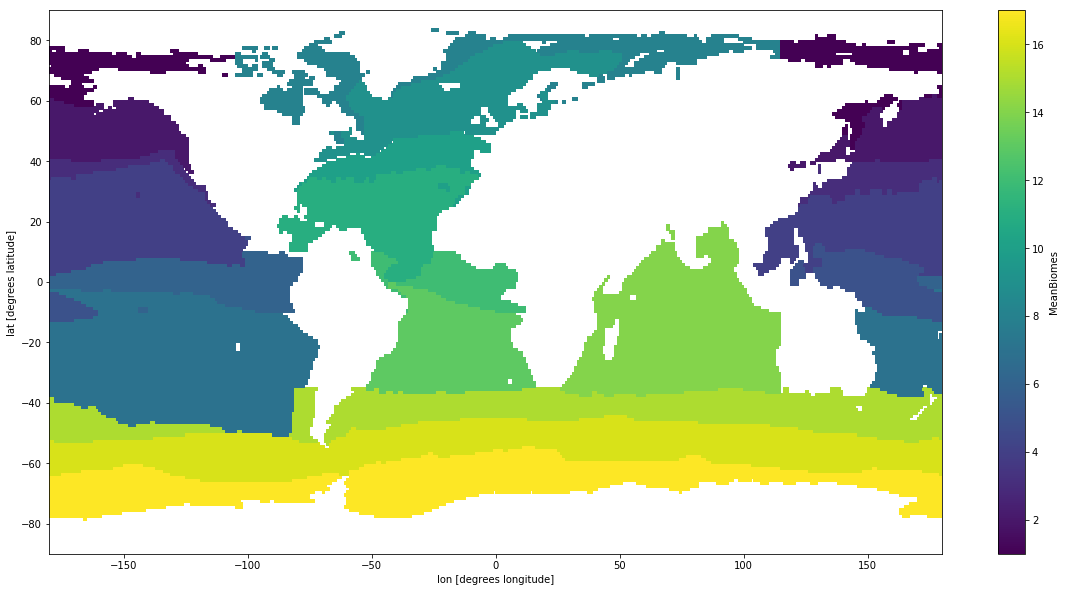

In [26]:
dst['MeanBiomes'].plot(figsize=[20,10], vmin=1, vmax=17)

## Get ASTE raw grid

In [6]:
file_aste_raw = '/local/data/artemis/workspace/rdussin/ASTE/GRID/nc/aste_grid.nc'
aste_raw = xr.open_dataset(file_aste_raw)

## Regrid the biomes

We use the nearest neighbor scheme not to alter any values

In [7]:
biomes_aste = MITgcm_recipes.regridding.regrid_2_mitgcm_llc(dst, aste_raw, ['MeanBiomes','CoreBiomes',
                                                                           'TimeVaryingBiomes'], 
                                                         method='nearest_s2d',
                                                         lonname='lon', latname='lat', point='T', 
                                                         periodic=True, reuse_weights=False)

Overwrite existing file: regrid_face0.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face1.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face2.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face3.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face4.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: regrid_face5.nc 
 You can set reuse_weights=True to save computing time.


Then we mask the results with the valid lon values of the ASTE grid to get rid of spurious values where XC = 0.

In [ ]:
biomes_aste_masked = biomes_aste.where(aste_raw['XC'] !=0)

## Check the results

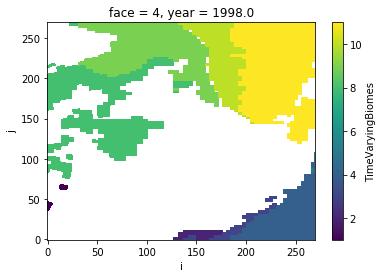

In [28]:
biomes_aste_masked['TimeVaryingBiomes'].sel(year=1998, face=4).plot()

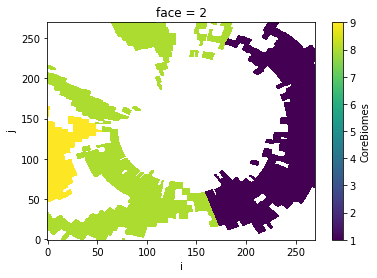

In [29]:
biomes_aste_masked['CoreBiomes'].sel(face=2).plot()

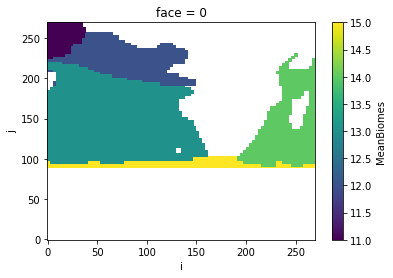

In [30]:
biomes_aste_masked['MeanBiomes'].sel(face=0).plot()

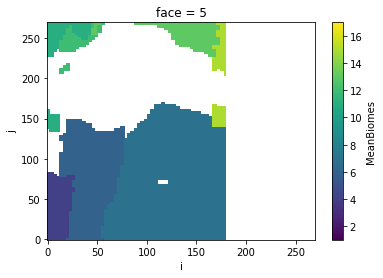

In [27]:
biomes_aste_masked['MeanBiomes'].sel(face=5).plot(vmin=1, vmax=17)

## Write dataset to netcdf

In [32]:
biomes_aste_masked.to_netcdf(datadir + '../interp_ASTE/' + 'Time_Varying_Biomes_ASTE.nc')